In [1]:
import os 
import pandas as pd 


# load data

In [6]:
train_path = "../data/piqa/piqa_train.json"
val_path = "../data/piqa/piqa_validation.json"
test_path = "../data/piqa/piqa_test.json"

train_df = pd.read_json(train_path)
val_df = pd.read_json(val_path)
test_df = pd.read_json(test_path)




In [7]:
train_df.head()


,goal,sol1,sol2,label
0,"When boiling butter, when it's ready, you can",Pour it onto a plate,Pour it into a jar,1
1,"To permanently attach metal legs to a chair, y...",Weld the metal together to get it to stay firm...,Nail the metal together to get it to stay firm...,0
2,how do you indent something?,leave a space before starting the writing,press the spacebar,0
3,how do you shake something?,move it up and down and side to side quickly.,stir it very quickly.,0
4,Clean tires,"Pour water, cape off caked on dirt. Use speed...","Pour water, scrape off caked on dirt. Use a st...",1


In [9]:
val_df.head()




,goal,sol1,sol2,label
0,How do I ready a guinea pig cage for it's new ...,Provide the guinea pig with a cage full of a f...,Provide the guinea pig with a cage full of a f...,0
1,dresser,replace drawer with bobby pin,"finish, woodgrain with bobby pin",1
2,To fight Ivan Drago in Rocky for sega master s...,Drago isn't in this game because it was releas...,You have to defeat Apollo Creed and Clubber La...,1
3,Make outdoor pillow.,Blow into tin can and tie with rubber band.,Blow into trash bag and tie with rubber band.,1
4,ice box,will turn into a cooler if you add water to it,will turn into a cooler if you add soda to it,0


In [10]:
test_df.head()


,goal,sol1,sol2,label
0,how do you puncture a vein?,hit it at the wrong angle and make it bleed.,pop it.,-1
1,hands,is used to put on shoe,is used to put on milk jug,-1
2,What ingredients do I need to make a shortcrus...,"To make pie crust, you will need flour, sugar,...","To make pie crust, you will need flour, sugar,...",-1
3,roast broccoli,Preheat oven to 450 degrees F. Toss the bro...,Preheat oven to 450 degrees F. Toss the bro...,-1
4,To crimp the edges of the patsy crust.,Use a knife to crimp the edges.,Use a fork to crimp the edges,-1


# Length analysis

In [13]:
train_df['goal'].apply(lambda x: len(x.split())).describe()


count    16113.000000
mean         7.060076
std          3.635874
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         34.000000
Name: goal, dtype: float64

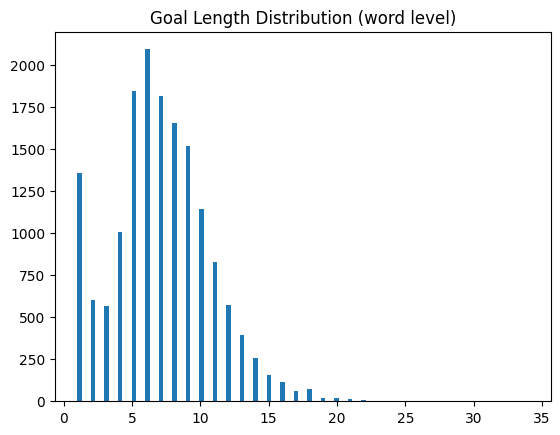

In [15]:
import matplotlib.pyplot as plt
plt.title("Goal Length Distribution (word level)")
plt.hist(train_df['goal'].apply(lambda x: len(x.split())), bins=100)
plt.show()




In [16]:
val_df['goal'].apply(lambda x: len(x.split())).describe()


count    1838.000000
mean        7.083787
std         3.647886
min         1.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        23.000000
Name: goal, dtype: float64

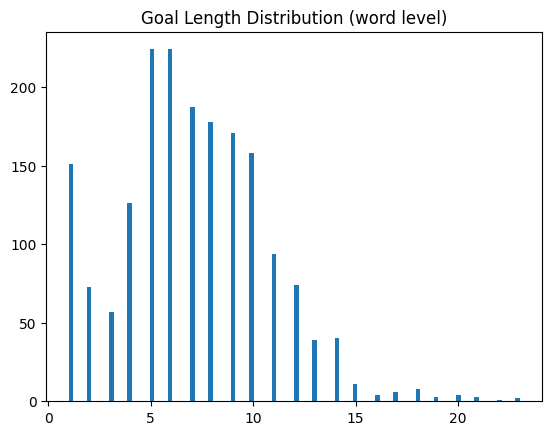

In [17]:
plt.title("Goal Length Distribution (word level)")
plt.hist(val_df['goal'].apply(lambda x: len(x.split())), bins=100)
plt.show()




In [18]:
test_df['goal'].apply(lambda x: len(x.split())).describe()


count    3084.000000
mean        7.026913
std         3.638139
min         1.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        29.000000
Name: goal, dtype: float64

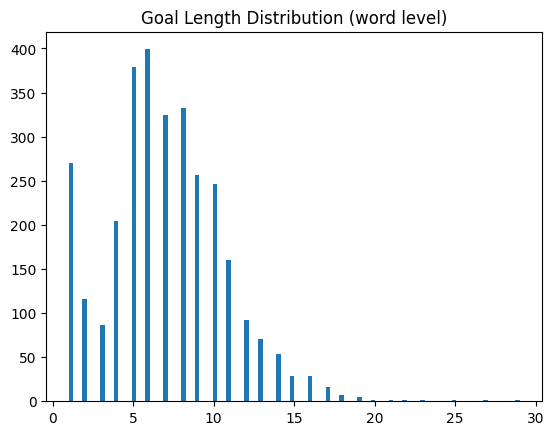

In [19]:
plt.title("Goal Length Distribution (word level)")
plt.hist(test_df['goal'].apply(lambda x: len(x.split())), bins=100)
plt.show()




# Check null, duplicate, and unique


In [20]:
train_df.isnull().sum()


goal     0
sol1     0
sol2     0
label    0
dtype: int64

In [23]:
dup_train = train_df[train_df.duplicated()]

dup_train


,goal,sol1,sol2,label
4923,What supplies are needed to make Easter inspir...,Plastic Eggs or Egg Ornaments 4 small c...,Plastic Eggs or Egg Ornaments 4 small c...,1
5014,How to peel a banana?,Hold both ends of the banana and peel back sec...,Hold one end of the banana and peel back secti...,1
11667,How to make a vodka and soda?,Put some ice in a glass. Measure an ounce and ...,Put some ice in a glass. Measure an ounce and ...,0
13927,How to curb your dog?,"Before the dog defecates, wear the plastic bag...","After the dog defecates, wear the plastic bag ...",1
14482,How to fold a bedsheet?,"Hold a corner of the bedsheet in each hand, fo...","Hold a corner of the bedsheet in each hand, fo...",1
15078,sandwich bag,can be recycled,can be frozen,0
